# 01 - Preprocesamiento Dataset Wisconsin Breast Cancer

**Objetivo:** Cargar, explorar y preparar el dataset de Wisconsin para entrenamiento

**Dataset:** Wisconsin Breast Cancer (Diagnostic)
- 569 pacientes
- 30 features numéricos
- Balance: 357 benignos / 212 malignos (1.69:1)

**Autores:** Hernán Zamorano y Martín Navarro  
**Universidad:** O'Higgins - COM4202

## 1. Imports y Configuración

In [2]:
# Imports básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Imports completados")

✓ Imports completados


## 2. Carga del Dataset

In [3]:
# Cargar dataset desde scikit-learn
print("Cargando Wisconsin Breast Cancer Dataset...")
data = load_breast_cancer(as_frame=True)

# Extraer componentes
X = data.data  # Features
y = data.target  # Target (0=maligno, 1=benigno)
feature_names = data.feature_names
target_names = data.target_names

print(f"\n{'='*70}")
print("DATASET CARGADO EXITOSAMENTE")
print(f"{'='*70}")
print(f"Total muestras: {len(X)}")
print(f"Total features: {len(feature_names)}")
print(f"Clases: {list(target_names)}")
print(f"\nPrimeras 5 filas:")
display(X.head())

Cargando Wisconsin Breast Cancer Dataset...

DATASET CARGADO EXITOSAMENTE
Total muestras: 569
Total features: 30
Clases: [np.str_('malignant'), np.str_('benign')]

Primeras 5 filas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Información General

In [4]:
# Información del dataset
print("INFORMACIÓN DEL DATASET")
print("="*70)
print(f"Shape: {X.shape}")
print(f"\nTipos de datos:")
print(X.dtypes.value_counts())
print(f"\nDatos faltantes:")
print(X.isnull().sum().sum())
print(f"\nMemoria: {X.memory_usage(deep=True).sum() / 1024:.2f} KB")

INFORMACIÓN DEL DATASET
Shape: (569, 30)

Tipos de datos:
float64    30
Name: count, dtype: int64

Datos faltantes:
0

Memoria: 133.48 KB


### 3.2 Balance de Clases

In [5]:
# Análisis de balance
unique, counts = np.unique(y, return_counts=True)
class_distribution = pd.DataFrame({
    'Clase': [target_names[i] for i in unique],
    'Cantidad': counts,
    'Porcentaje': (counts / len(y) * 100).round(2)
})

print("\nDISTRIBUCIÓN DE CLASES")
print("="*70)
display(class_distribution)

ratio = counts[1] / counts[0]
print(f"\nRatio Benigno:Maligno = {ratio:.2f}:1")
if 0.5 < ratio < 2.0:
    print("✅ DATASET BIEN BALANCEADO")
else:
    print("⚠️  Dataset desbalanceado - considerar técnicas de balanceo")


DISTRIBUCIÓN DE CLASES


,Clase,Cantidad,Porcentaje
0,malignant,212,37.26
1,benign,357,62.74



Ratio Benigno:Maligno = 1.68:1
✅ DATASET BIEN BALANCEADO


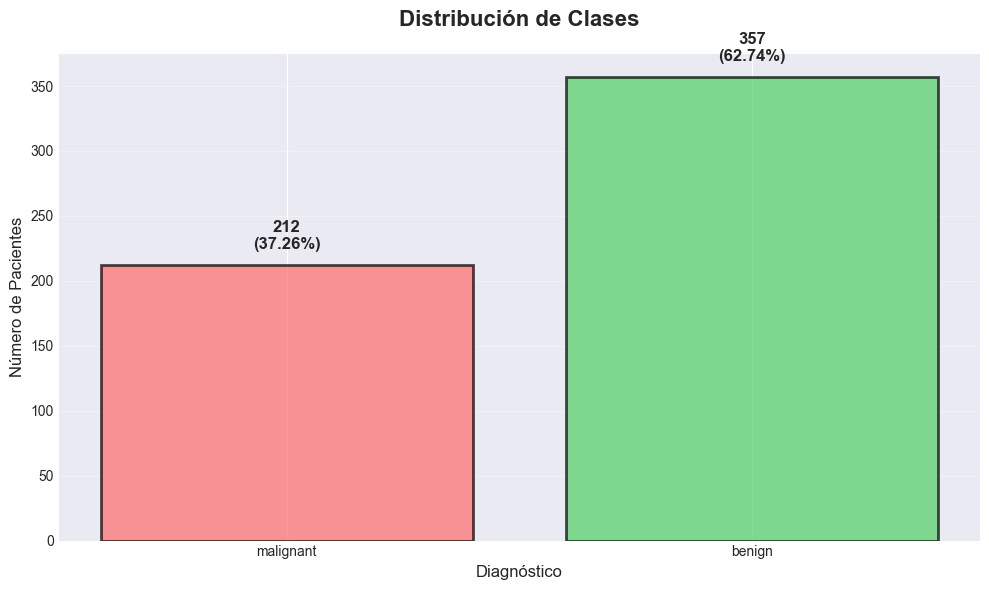

In [6]:
# Visualización del balance
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#ff6b6b', '#51cf66']
bars = ax.bar(class_distribution['Clase'], class_distribution['Cantidad'], 
              color=colors, alpha=0.7, edgecolor='black', linewidth=2)

ax.set_title('Distribución de Clases', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Número de Pacientes', fontsize=12)
ax.set_xlabel('Diagnóstico', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (bar, count, pct) in enumerate(zip(bars, counts, class_distribution['Porcentaje'])):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{count}\n({pct}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.3 Estadísticas Descriptivas

In [7]:
# Estadísticas básicas
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*70)
display(X.describe().T)

ESTADÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
# Identificar features con mayor varianza
variances = X.var().sort_values(ascending=False).head(10)
print("\nTOP 10 FEATURES CON MÁS VARIANZA")
print("="*70)
for feature, var in variances.items():
    print(f"{feature:35} Varianza: {var:,.2f}")


TOP 10 FEATURES CON MÁS VARIANZA
worst area                          Varianza: 324,167.39
mean area                           Varianza: 123,843.55
area error                          Varianza: 2,069.43
worst perimeter                     Varianza: 1,129.13
mean perimeter                      Varianza: 590.44
worst texture                       Varianza: 37.78
worst radius                        Varianza: 23.36
mean texture                        Varianza: 18.50
mean radius                         Varianza: 12.42
perimeter error                     Varianza: 4.09


### 3.4 Distribución de Features por Clase

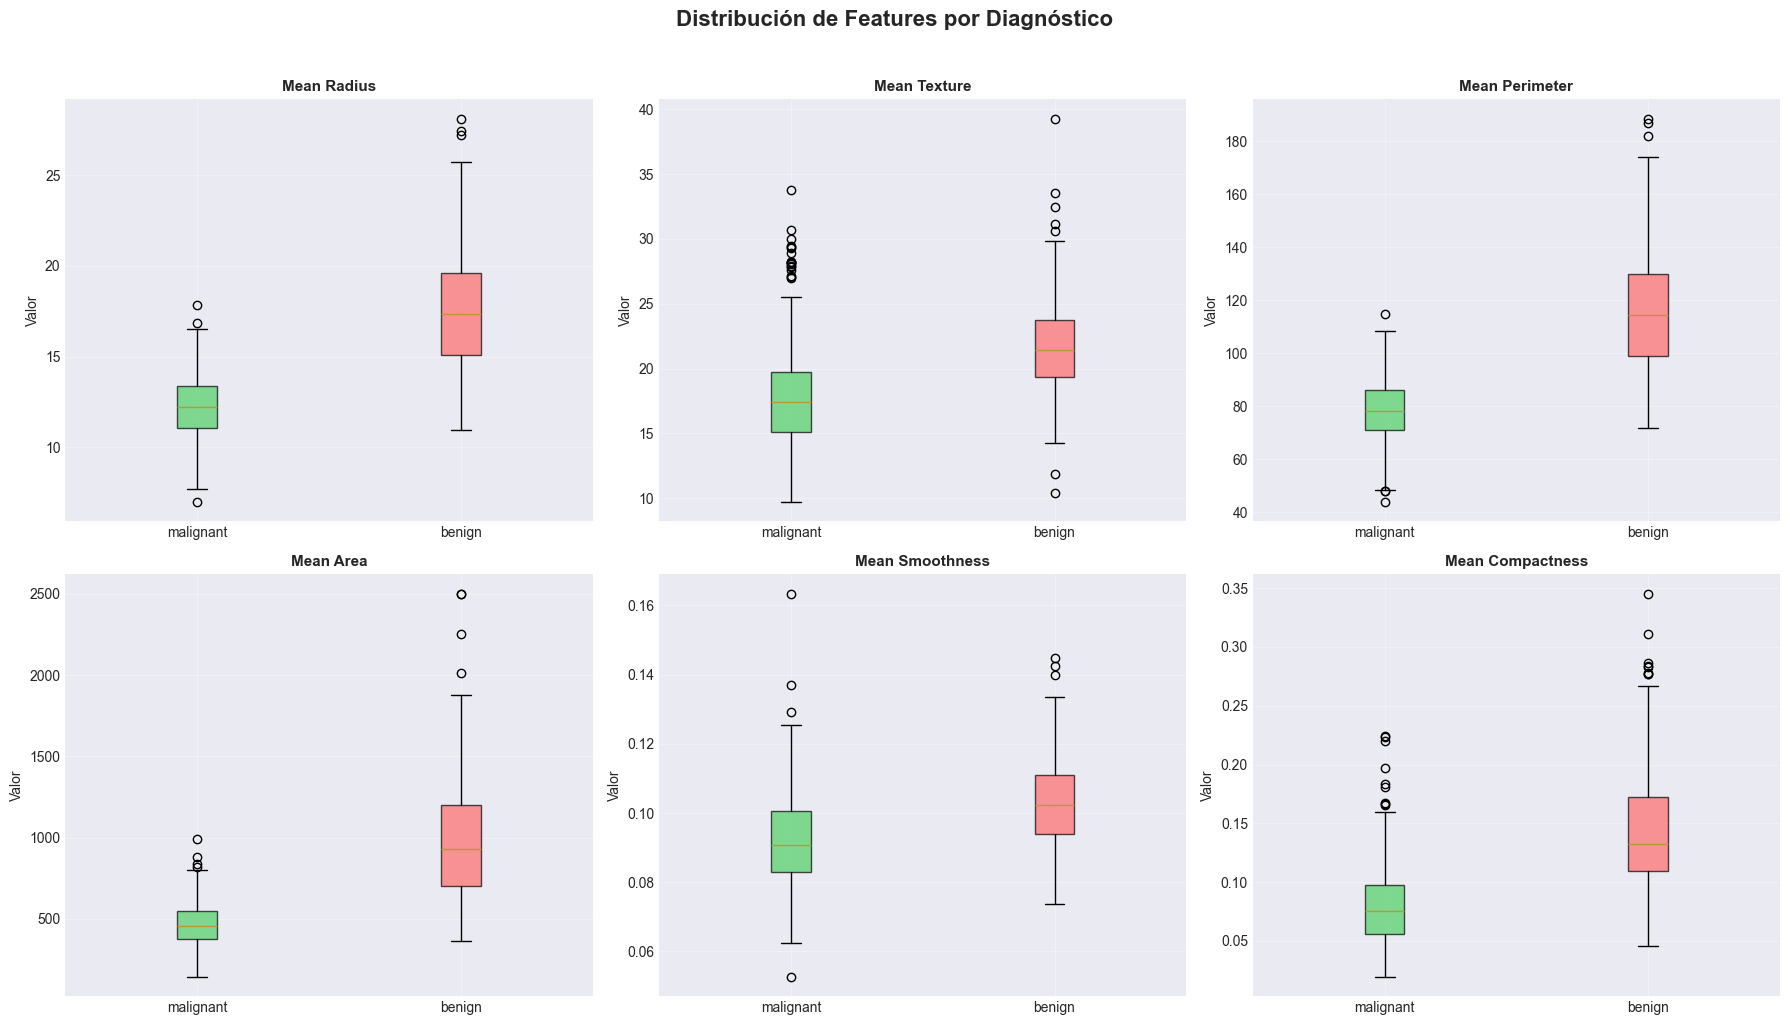

In [9]:
# Boxplots de features importantes
important_features = ['mean radius', 'mean texture', 'mean perimeter', 
                     'mean area', 'mean smoothness', 'mean compactness']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(important_features):
    # Crear DataFrame para plotting
    df_plot = pd.DataFrame({
        'value': X[feature],
        'diagnosis': [target_names[i] for i in y]
    })
    
    # Boxplot
    bp = axes[idx].boxplot(
        [df_plot[df_plot['diagnosis'] == target_names[1]]['value'],
         df_plot[df_plot['diagnosis'] == target_names[0]]['value']],
        labels=target_names,
        patch_artist=True
    )
    
    # Colorear boxplots
    for patch, color in zip(bp['boxes'], ['#51cf66', '#ff6b6b']):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(feature.replace('_', ' ').title(), 
                       fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Valor', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Distribución de Features por Diagnóstico', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.5 Matriz de Correlación

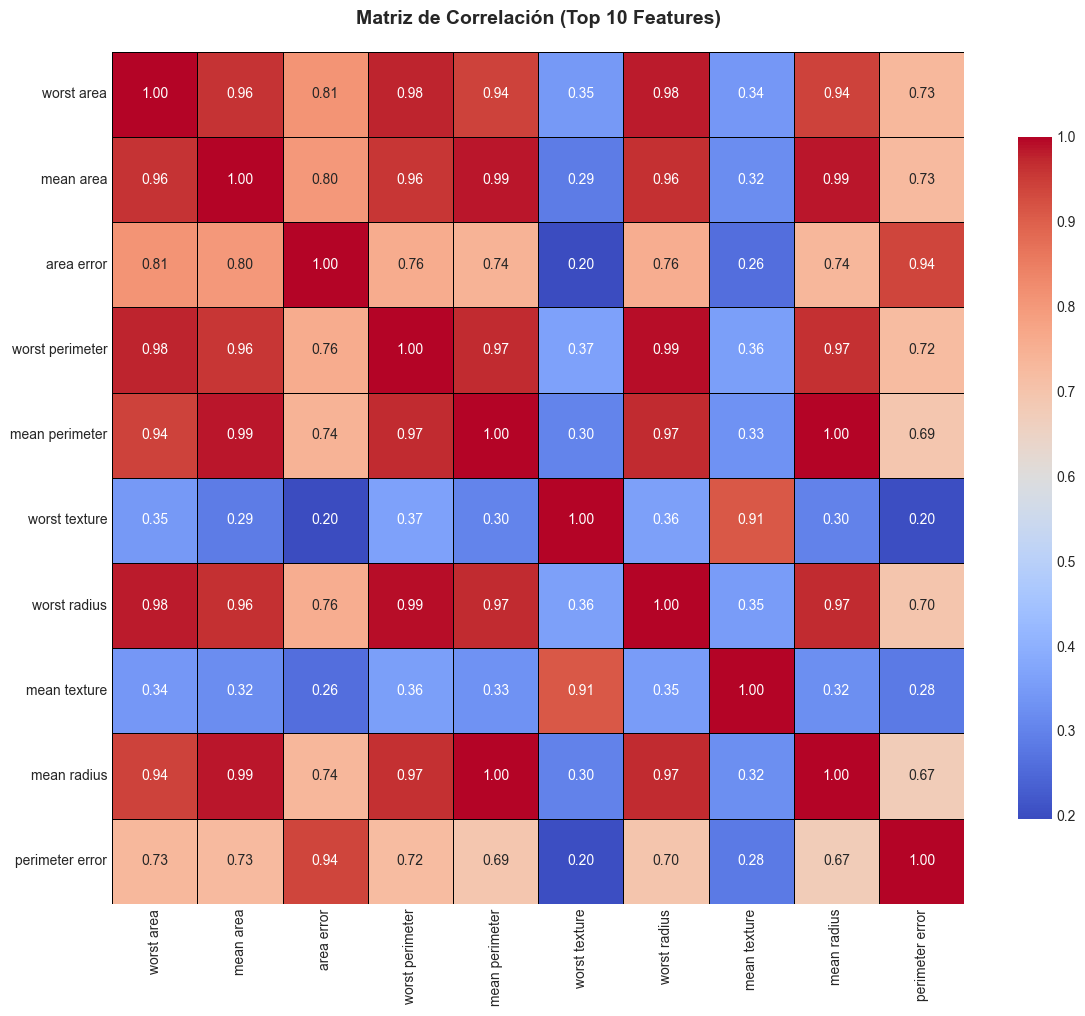

In [10]:
# Calcular correlación para top 10 features más variables
top_features = X.var().sort_values(ascending=False).head(10).index
corr = X[top_features].corr()

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, cbar_kws={'shrink': 0.8},
            linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación (Top 10 Features)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 3.6 Análisis de Componentes Principales (PCA)

In [11]:
# Aplicar PCA para visualización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("ANÁLISIS PCA")
print("="*70)
print(f"Varianza explicada PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Varianza explicada PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.2%}")

ANÁLISIS PCA
Varianza explicada PC1: 44.27%
Varianza explicada PC2: 18.97%
Varianza total explicada: 63.24%


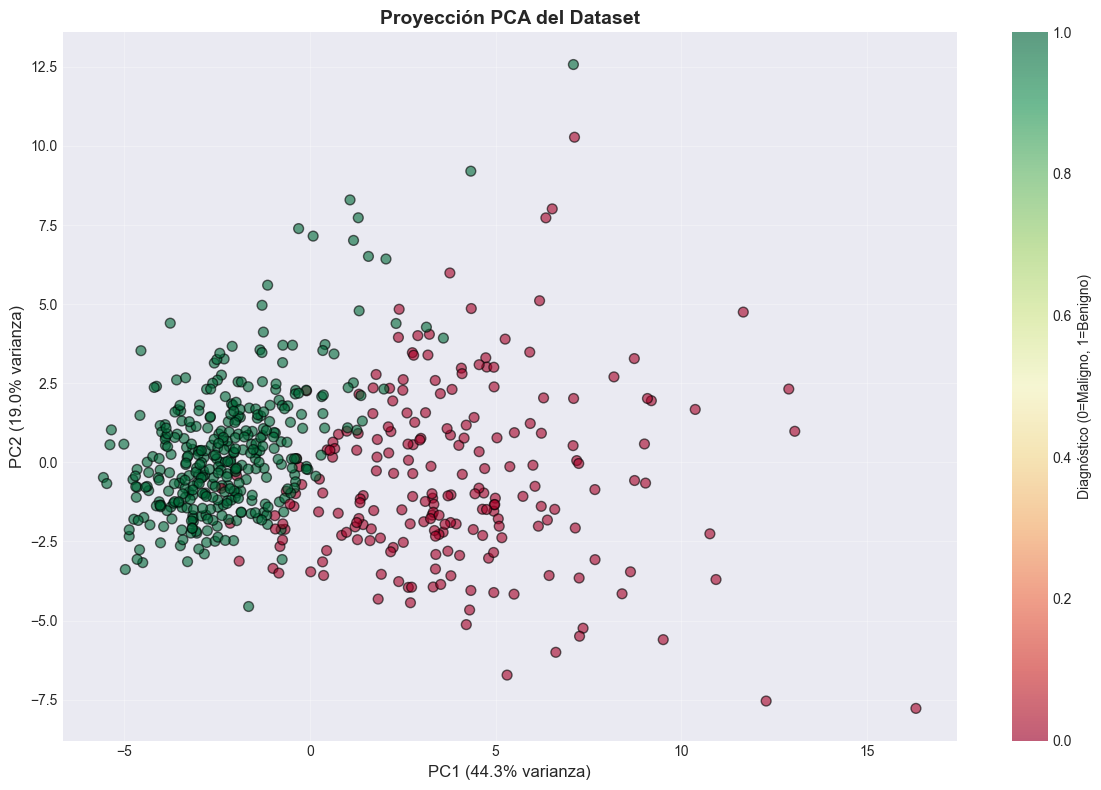


✅ Las clases son SEPARABLES en el espacio PCA


In [12]:
# Visualización PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, 
                     cmap='RdYlGn', s=50, alpha=0.6, edgecolors='black')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} varianza)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} varianza)', fontsize=12)
plt.title('Proyección PCA del Dataset', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Diagnóstico (0=Maligno, 1=Benigno)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✅ Las clases son SEPARABLES en el espacio PCA")

## 4. Preprocesamiento

### 4.1 División Train/Test

In [13]:
# Split stratificado
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE, 
    stratify=y
)

print("DIVISIÓN TRAIN/TEST")
print("="*70)
print(f"Train set: {len(X_train)} muestras ({(1-TEST_SIZE)*100:.0f}%)")
print(f"Test set:  {len(X_test)} muestras ({TEST_SIZE*100:.0f}%)")

# Verificar balance en train/test
print(f"\nBalance en TRAIN:")
train_counts = np.bincount(y_train)
print(f"  Malignos:  {train_counts[0]} ({train_counts[0]/len(y_train)*100:.1f}%)")
print(f"  Benignos:  {train_counts[1]} ({train_counts[1]/len(y_train)*100:.1f}%)")

print(f"\nBalance en TEST:")
test_counts = np.bincount(y_test)
print(f"  Malignos:  {test_counts[0]} ({test_counts[0]/len(y_test)*100:.1f}%)")
print(f"  Benignos:  {test_counts[1]} ({test_counts[1]/len(y_test)*100:.1f}%)")

print("\n✅ Balance preservado en train y test")

DIVISIÓN TRAIN/TEST
Train set: 455 muestras (80%)
Test set:  114 muestras (20%)

Balance en TRAIN:
  Malignos:  170 (37.4%)
  Benignos:  285 (62.6%)

Balance en TEST:
  Malignos:  42 (36.8%)
  Benignos:  72 (63.2%)

✅ Balance preservado en train y test


### 4.2 Escalado de Features

In [14]:
# Inicializar scaler
scaler = StandardScaler()

# Fit en train, transform en train y test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de vuelta a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("ESCALADO DE FEATURES (StandardScaler)")
print("="*70)
print(f"Media después de scaling (train): {X_train_scaled.mean().mean():.2e}")
print(f"Std después de scaling (train):   {X_train_scaled.std().mean():.2f}")
print(f"\nRango original: [{X_train.min().min():.2f}, {X_train.max().max():.2f}]")
print(f"Rango escalado: [{X_train_scaled.min().min():.2f}, {X_train_scaled.max().max():.2f}]")
print("\n✅ Features escalados correctamente")

ESCALADO DE FEATURES (StandardScaler)
Media después de scaling (train): 5.00e-17
Std después de scaling (train):   1.00

Rango original: [0.00, 3432.00]
Rango escalado: [-2.72, 11.66]

✅ Features escalados correctamente


### 4.3 Verificación de Preprocesamiento

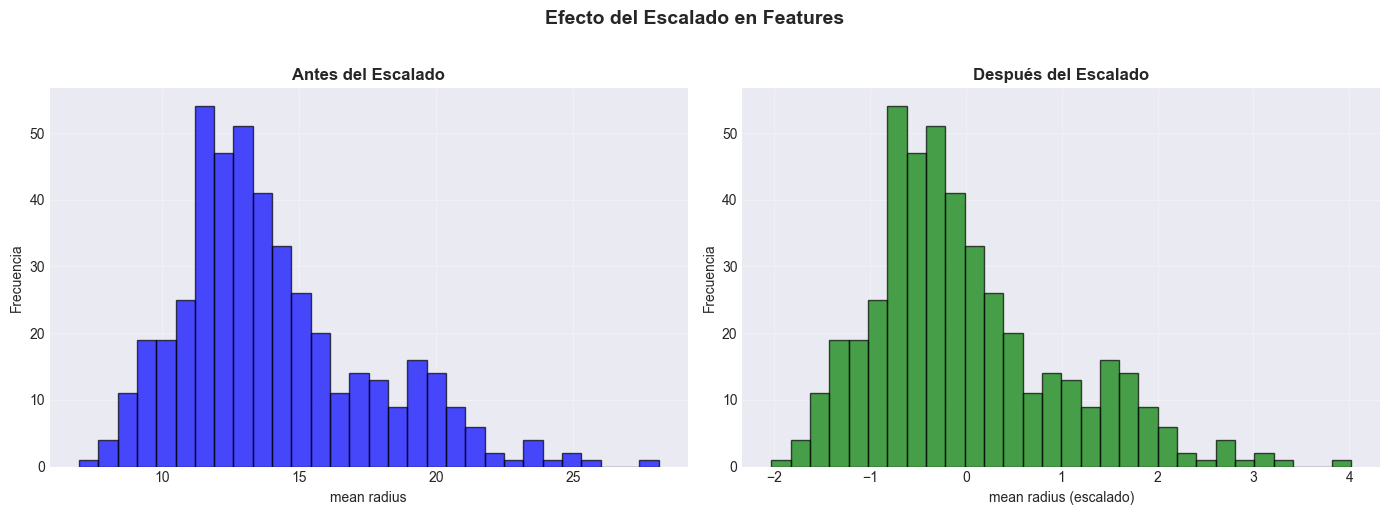

In [15]:
# Comparar distribuciones antes y después
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Antes del escalado
feature_sample = 'mean radius'
axes[0].hist(X_train[feature_sample], bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Antes del Escalado', fontsize=12, fontweight='bold')
axes[0].set_xlabel(feature_sample, fontsize=10)
axes[0].set_ylabel('Frecuencia', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Después del escalado
axes[1].hist(X_train_scaled[feature_sample], bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Después del Escalado', fontsize=12, fontweight='bold')
axes[1].set_xlabel(f'{feature_sample} (escalado)', fontsize=10)
axes[1].set_ylabel('Frecuencia', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.suptitle('Efecto del Escalado en Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 5. Guardar Datos Procesados

In [16]:
# Guardar arrays procesados
import os

# Crear directorio
os.makedirs('data_processed', exist_ok=True)

# Guardar
np.savez('data_processed/breast_cancer_processed.npz',
         X_train=X_train_scaled.values,
         X_test=X_test_scaled.values,
         y_train=y_train,
         y_test=y_test,
         feature_names=feature_names,
         target_names=target_names)

# Guardar también scaler
import pickle
with open('data_processed/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("DATOS GUARDADOS")
print("="*70)
print("✓ data_processed/breast_cancer_processed.npz")
print("✓ data_processed/scaler.pkl")
print(f"\nTamaño total: {os.path.getsize('data_processed/breast_cancer_processed.npz') / 1024:.2f} KB")

DATOS GUARDADOS
✓ data_processed/breast_cancer_processed.npz
✓ data_processed/scaler.pkl

Tamaño total: 142.05 KB


## 6. Resumen Final

In [17]:
print("\n" + "="*70)
print("RESUMEN DEL PREPROCESAMIENTO")
print("="*70)
print(f"\n✅ Dataset cargado: {len(X)} muestras, {len(feature_names)} features")
print(f"✅ Balance verificado: {counts[1]} benignos / {counts[0]} malignos (ratio {ratio:.2f}:1)")
print(f"✅ Train/Test split: {len(X_train)}/{len(X_test)} (80%/20%)")
print(f"✅ Features escalados con StandardScaler")
print(f"✅ Datos guardados en data_processed/")
print(f"\n🎯 LISTO PARA ENTRENAMIENTO")
print(f"   Continuar con: 03_Pipeline_Completo_BreastCancer.ipynb")
print("="*70)


RESUMEN DEL PREPROCESAMIENTO

✅ Dataset cargado: 569 muestras, 30 features
✅ Balance verificado: 357 benignos / 212 malignos (ratio 1.68:1)
✅ Train/Test split: 455/114 (80%/20%)
✅ Features escalados con StandardScaler
✅ Datos guardados en data_processed/

🎯 LISTO PARA ENTRENAMIENTO
   Continuar con: 03_Pipeline_Completo_BreastCancer.ipynb
